In [37]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
#import data
md_df = pd.read_csv('Resources/Pymaceuticals_data_Mouse_metadata.csv')
sr_df = pd.read_csv('Resources/Pymaceuticals_data_Study_results.csv')
md_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [3]:
sr_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [4]:
#check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
sr_df = sr_df.drop_duplicates()
df = pd.merge(md_df, sr_df, on='Mouse ID')
df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [5]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen.
drug_df = df.groupby(['Drug Regimen'])
tumorMean = drug_df['Tumor Volume (mm3)'].mean()
tumorMedian = drug_df['Tumor Volume (mm3)'].median()
tumorVar = drug_df['Tumor Volume (mm3)'].var()
tumorSD = drug_df['Tumor Volume (mm3)'].std()
#tumorSEM = sem(drug_df['Tumor Volume (mm3)'], axis=None, ddof=0)

drugSummary = pd.DataFrame({'Tumor Mean Volume': tumorMean,
                           'Tumor Median Volume': tumorMedian,
                           'Tumor Variance': tumorVar,
                           'Tumor Standard Deviation': tumorSD})
drugSummary

Tumor Mean Volume  Tumor Median Volume  Tumor Variance  \
Drug Regimen                                                           
Capomulin             40.675741            41.557809       24.947764   
Ceftamin              52.591172            51.776157       39.290177   
Infubinol             52.884795            51.820584       43.128684   
Ketapril              55.235638            53.698743       68.553577   
Naftisol              54.331565            52.509285       66.173479   
Placebo               54.033581            52.288934       61.168083   
Propriva              52.368318            50.909965       42.278090   
Ramicane              40.216745            40.673236       23.486704   
Stelasyn              54.233149            52.431737       59.450562   
Zoniferol             53.236507            51.818479       48.533355   

              Tumor Standard Deviation  
Drug Regimen                            
Capomulin                     4.994774  
Ceftamin                      6.268188  
Infubinol                     6.567243  
Ketapril                      8.279709  
Naftisol                      8.134708  
Placebo                       7.821003  
Propriva                      6.502160  
Ramicane                      4.846308  
Stelasyn                      7.710419  
Zoniferol                     6.966589

<BarContainer object of 10 artists>

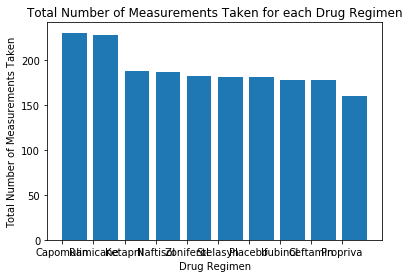

In [10]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
drugCounts = df['Drug Regimen'].value_counts()
xaxis = np.arange(0,len(drugCounts))
tickLocations = [value for value in xaxis]
plt.xticks(tickLocations, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Ifubinol','Ceftamin','Propriva'])
plt.title('Total Number of Measurements Taken for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements Taken')
plt.bar(xaxis, drugCounts, align='edge')

Text(0.5, 1.0, 'Total Number of Measurements Taken for each Drug Regimen')

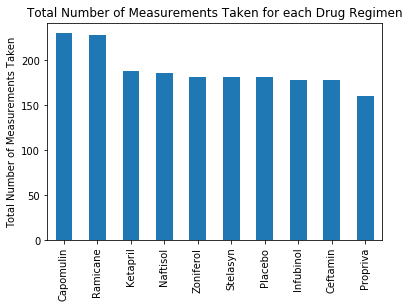

In [21]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
drugCounts.plot(kind="bar")
plt.ylabel('Total Number of Measurements Taken')
plt.title('Total Number of Measurements Taken for each Drug Regimen')

([<matplotlib.patches.Wedge at 0x7f8fd7affc88>,
 [Text(-0.6901369591455114, -0.8565693069573453, 'Male'),
  Text(0.6901370393433148, 0.8565692423420561, 'Female')],
 [Text(-0.3764383413520971, -0.4672196219767338, '50.6%'),
  Text(0.37643838509635347, 0.46721958673203057, '49.4%')])

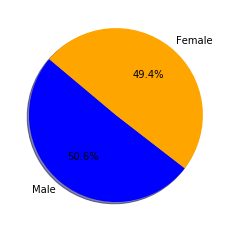

In [20]:
#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
sex_df = df['Sex'].value_counts()
sizes = [sex_df[0], sex_df[1]]
labels = ["Male", 'Female']
#explode = (0.1, 0, 0, 0)
colors = ["Blue", "Orange"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

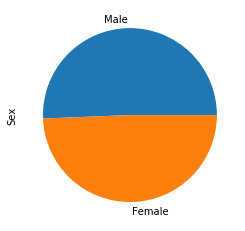

In [18]:
#Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
sex_df.plot(kind="pie")

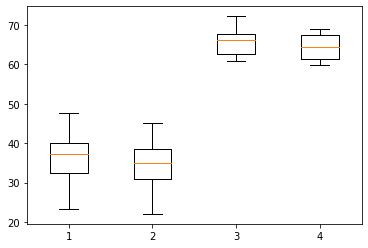

In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
#quantitatively determine if there are any potential outliers across all four treatment regimens.

#Locate by Drug Name 
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
ramicane_df = df.loc[df["Drug Regimen"] == "Ramicane"]
infubinol_df = df.loc[df["Drug Regimen"] == "Infubinol"]
ceftamin_df = df.loc[df["Drug Regimen"] == "Ceftamin"]

#Locate by final timepoint
capomulin_df = capomulin_df.loc[capomulin_df['Timepoint'] == 45]
ramicane_df = ramicane_df.loc[ramicane_df['Timepoint'] == 45]
infubinol_df = infubinol_df.loc[infubinol_df['Timepoint'] == 45]
ceftamin_df = ceftamin_df.loc[ceftamin_df['Timepoint'] == 45]

#Final Tumor Volume by Drug
capomulinFinalVolume = capomulin_df['Tumor Volume (mm3)']
ramicaneFinalVolume = ramicane_df['Tumor Volume (mm3)']
infubinolFinalVolume = infubinol_df['Tumor Volume (mm3)']
ceftaminFinalVolume = ceftamin_df['Tumor Volume (mm3)']

#Calculate the quartiles and IQR and 
#quantitatively determine if there are any potential outliers across all four treatment regimens.

capomulinQuartiles = capomulinFinalVolume.quantile([0.25,0.5,0.75])
capomulinLowerq = capomulinQuartiles[0.25]
capomulinUpperq = capomulinQuartiles[0.75]
capomulinIQR = capomulinUpperq - capomulinLowerq 

ramicaneQuartiles = ramicaneFinalVolume.quantile([0.25,0.5,0.75])
ramicaneLowerq = ramicaneQuartiles[0.25]
ramicaneUpperq = ramicaneQuartiles[0.75]
ramicaneIQR = ramicaneUpperq - ramicaneLowerq 

infubinolQuartiles = infubinolFinalVolume.quantile([0.25,0.5,0.75])
infubinolLowerq = infubinolQuartiles[0.25]
infubinolUpperq = infubinolQuartiles[0.75]
infubinolIQR = infubinolUpperq - infubinolLowerq 

ceftaminQuartiles = ceftaminFinalVolume.quantile([0.25,0.5,0.75])
ceftaminLowerq = ceftaminQuartiles[0.25]
ceftaminUpperq = ceftaminQuartiles[0.75]
ceftaminIQR = ceftaminUpperq - ceftaminLowerq 

data = [capomulinFinalVolume, ramicaneFinalVolume, infubinolFinalVolume, ceftaminFinalVolume]
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and 
#highlight any potential outliers in the plot by changing their color and style.
fig, ax = plt.subplots()

ax.boxplot(data)
plt.show()



Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Timepoint for Capomulin Mouse s185')

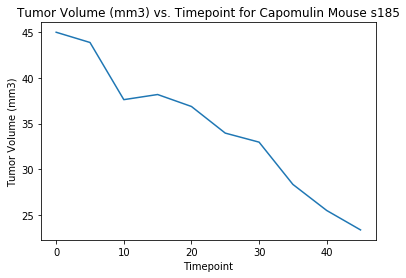

In [33]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
capomulinMouse = df.loc[df["Mouse ID"] == "s185"]
x_axis = capomulinMouse["Timepoint"]
y_axis = capomulinMouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Timepoint for Capomulin Mouse s185")

Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Weight (g) for Capomulin')

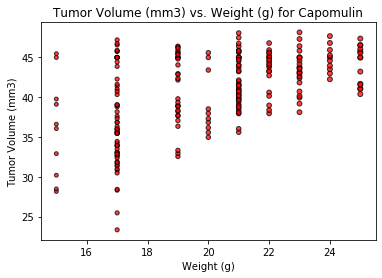

In [35]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
x_axis = capomulin_df["Weight (g)"]
y_axis = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Weight (g) for Capomulin")

Text(0.5, 1.0, 'Tumor Volume (mm3) vs. Weight (g) for Capomulin')

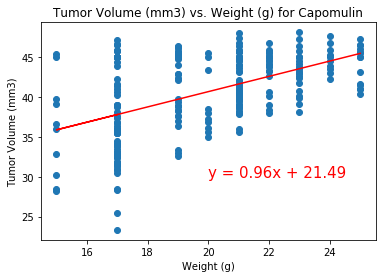

In [41]:
#Calculate the correlation coefficient and linear regression model between mouse weight and 
#average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
capomulin_df = df.loc[df["Drug Regimen"] == "Capomulin"]
x_axis = capomulin_df["Weight (g)"]
y_axis = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) vs. Weight (g) for Capomulin")

In [14]:
#Look across all previously generated figures and tables and write at least three observations or inferences 
#that can be made from the data. Include these observations at the top of notebook.